# Project: Global Shark Attacks Analyis

## I-Overview
[The target of this project to answer to one problematics using the dataset : Sharks](https://www.kaggle.com/teajay/global-shark-attacks/version/1)
For this analysis I have taken the point of view of a research center like the Scharkschool which mission is to change the negative picture and the sterotypes the sharks are suffering from.
Here the questions I will aim at answering using this dataset. :
	* Are shark attacks more frequent than ever? 
    * How much deadly are the actual attacks ?


## II-Steps followed:

 ### II.1 - Import of the file 
 
 ### II.2 - Analysis of the file structure:
 
 	- name of columns
 	- number of rows/columns
	- number of empty/not empty cells per column
	- Type of data, syze of the dataset
	- check the frequency of each element for each column ==> define whether the column requires an important cleaning
	
 ### II.3 General claning:
 
 	- Clean column titles => to ease selection 
    - Delete empty rows and columns
    - Delete duplicated rows and columns
    - check whether it is worth keeping 3 columns case number
    - Definition of a function to get information about the column before starting the cleaning

 ### II.4  Column cleaning
 
	The questions to be answerered are: 
    * Are shark attacks more frequent than ever? 
    * How much deadly are the actual attacks ?
    
So we will need to use the column, **Year**,** Fatal ((Y/N))** and **Injury** to see whether all attacks lead to injuries or death and remove irrelevant records. We also used the species column to find irrelevant attacks and reduce the number of records to clean in Fatal column.

	Before using the data of this column we clean the data in order to have the best possible picture.
	# Cleaning steps:
		Get a description of the column
		Correct the typo errors
		Fill in the missing values in order to keep the row or drop it if not relevant
		drop values which are not relevant for the analysis.
        Check supposed to be already clean values: ex is a Fatal=Y is actually linked to a fatal injury for instance
        Start cleaning the next column using the already cleaned dataframe
        
### Analysis

        Graph the data to see the evolutions
        Draw conclusions
		

# Librairies

In [466]:
import os
import pandas as pd
import numpy as np

# Read File and get overall information of the dataframe

Read imported files
Sources : https://www.kaggle.com/teajay/global-shark-attacks

In [467]:
initial_data=pd.read_csv('/Users/sandrine/desktop/prework/Projects_Ironhack/Shark_lab/attacks.csv',encoding='latin-1')
# use encoding = 'Latin-1 '

In [468]:
initial_data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [469]:
#Number of rows and columns
initial_data.shape

(25723, 24)

In [470]:
# check DataFrame info
initial_data.info()

# all the columns at max 1/3 full=> there may be fully null rows in the dataframe
# 3 columns named Case Number==> check whether there are the same or not and whether it is necessary to keep them all.
# 2 Unnamed colums with almost no values . Check whether they can be deleted.
# Can species and time and age be used given the high level of missingg data?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

**Analyze the DataFrame general information before starting

In [471]:
# function checking the Frequency of the different elements in each column of a dataframe
def freq_element_percolumn(data):
    cols=data.columns
    for i in cols:
        freq_per_element=pd.Series(data[i]).value_counts(normalize=True)*100
        print(f'Column studied is : {i}')
        display(freq_per_element)
    return

#freq_element_percolumn(initial_data)

# CLEANING


In [472]:
# General cleaning:
# Clean column titles => to ease selection 
# delete empty rows and columns
# delete duplicated rows and columns
# check whether it is worth keepin 3 columns case number


 ° Clean column titles 

In [473]:
initial_data.columns=pd.Series(list(initial_data.columns)).str.lower().str.title().str.replace(' ','_').str.replace('Sex_','Sex').str.replace('Species_','Species').str.replace(':','').str.replace('.','')
initial_data.head()

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_Or_Source,Pdf,Href_Formula,Href,Case_Number1,Case_Number2,Original_Order,Unnamed_22,Unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [474]:
# Delete empty rows and columns

In [475]:
# drop rows if there is maximum 2 values in the row.
def Drop_almost_empty_rows(data):
    return data[data.isnull().sum(axis=1) <= len(data.columns) - 3]
data=Drop_almost_empty_rows(initial_data)
data

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_Or_Source,Pdf,Href_Formula,Href,Case_Number1,Case_Number2,Original_Order,Unnamed_22,Unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [476]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal_(Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

In [477]:
#Deleting not necessary columns.
data=data.drop(['Unnamed_22','Unnamed_23'],axis=1)
data

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal_(Y/N),Time,Species,Investigator_Or_Source,Pdf,Href_Formula,Href,Case_Number1,Case_Number2,Original_Order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [478]:
# Source google: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/
def get_duplicated_columns(data):        
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duPcolumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(data.shape[1]):
        # Select column at xth index.
        col = data.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x+1,data.shape[1]):
            # Select column at yth index.
            otherCol = data.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duPcolumnNames.add(data.columns.values[y])
    return list(duPcolumnNames)

get_duplicated_columns(data)
# no duplicated columns

[]

In [479]:
# check duplitated rows and drop tem:
data=data.drop_duplicates()

In [480]:
# Check the differences between 3 columns Case_Number ==> Not worth to be cleaned as not used. 

In [481]:
def Check_Dup_Two_columns(data,col1,col2):
    
    CheckDup=list(data[col1]==data[col2])
    # Index where the the differences occurs
    indexDup=[i for i in range(len(CheckDup)) if CheckDup[i]==False] 
    print(f'position of duplicates elements for {col1} & {col2} is {indexDup}. There is {len(indexDup)} positions.')
    return indexDup

set1=set(Check_Dup_Two_columns(data,'Case_Number','Case_Number2'))
set2=set(Check_Dup_Two_columns(data,'Case_Number','Case_Number1'))
set3=set(Check_Dup_Two_columns(data,'Case_Number2','Case_Number1'))
print('to check', set1.union(set2).union(set3))

#for i in set1.union(set2).union(set3):
   # display(data.loc[i]) 

position of duplicates elements for Case_Number & Case_Number2 is [390, 4949, 5488, 5944]. There is 4 positions.
position of duplicates elements for Case_Number & Case_Number1 is [34, 117, 144, 217, 314, 334, 339, 390, 560, 3522, 3795, 3880, 4403, 4425, 4949, 5275, 5358, 5386, 5488, 5777, 5883, 5944, 6009, 6122]. There is 24 positions.
position of duplicates elements for Case_Number2 & Case_Number1 is [34, 117, 144, 217, 314, 334, 339, 560, 3522, 3795, 3880, 4403, 4425, 5275, 5358, 5386, 5777, 5883, 6009, 6122]. There is 20 positions.
to check {390, 5386, 144, 5777, 5275, 34, 3880, 560, 4403, 5944, 314, 3522, 4425, 334, 339, 3795, 4949, 217, 6122, 5358, 5488, 117, 6009, 5883}


# Cleaning linked to the problematics

Questions to answer:
*  Are shark attacks more frequent than ever? 
*  How much deadly they really are


  ==>TO DO : Columns to clean Year, Fatal Y/N, Injury

In [482]:
# Function to get the some information about the column
def get_basic_info_for_column(data,col):
    #check frequency of each element of the column (in %)
    display(pd.Series(data[col]).value_counts(normalize=True)*100)
    #print the min and the max for numeric data
    if data[col].dtype=='float64' or  data[col].dtype=='int':
        print('Min & Max', min(data[col]), max(data[col]))
    #how many missing data in Year column?:
    print('nb of missing values' ,data[col].isnull().sum())
    return None


# Partial cleaning Species column

In [483]:
#trying to identify invalid rows using species to go faster in the cleaning of Fatal column(from 538 to 62 missing values to clean)

In [484]:
get_basic_info_for_column(data,'Species' )
data.Species=data.Species=data.Species.str.lower().str.replace(' ','_').replace(['shark_involvement_questionable','questionable_incident','shark_involvement_prior_to_death_was_not_confirmed','shark_involvement_not_confirmed','shark_involvement_prior_to_death_unconfirmed','questionable','no_shark_involvement','shark_involvement_prior_to_death_not_confirmed', 'shark_involvement_prior_to_death_suspected_but_not_confirmed','shark_involvement_probable','shark_involvement_doubtful','shark_involvement_not_cofirmed',"thought_to_involve_a_3'_to_4'_shark,_but_shark_involvement_not_confirmed",'shark_involvement_unconfirmed','shark_involvement_prior_to_death_still_to_be_determined','shark_involvement_not_confirmed;_thought_to_be_a_barracuda_bite','shark_involvement_prior_to_deaths_was_not_confirmed','reported_by_media_as_shark_attack,_but_shark_involvement_prior_to_death_was_not_confirmed','shark_involvement__questionable','shark_involvement_not_confirmed,_injury_may_have_been_caused_by_a_bluefish','questionable_incident_-_shark_bite_may_have_precipitated_drowning','invalid_incident','questionable_incident;_reported_as_shark_attack_but_thought_to_involve_a_pinniped_instead_','considered_a_"doubtful"_incident','salmon_shark_suspected,_but_unlikely',"questionable_incident,_said_to_involve_a_6'_shark",'shark_involvement_prior_to_death_could_not_be_determined','shark_involvement_suspected_but_not_confirmed','shark_involvement_prior_to_death_remains_unconfirmed'],'invalid')

for i in range(data.shape[0]):
    if data.Species.loc[i]=='invalid':
        data['Fatal_(Y/N)'].loc[i]='not_relevant'

White shark                                           4.705543
Shark involvement prior to death was not confirmed    3.031178
Invalid                                               2.944573
Shark involvement not confirmed                       2.540416
Tiger shark                                           2.107390
                                                        ...   
60 cm [2'] captive shark                              0.028868
Shortfin mako shark, 175-lb                           0.028868
White shark, >6'                                      0.028868
 Wobbegong shark, 1.6 to 1.8m                         0.028868
Zambesi shark, 2m                                     0.028868
Name: Species, Length: 1549, dtype: float64

nb of missing values 2838


/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


# Cleaning Fatal column

In [485]:
# get info
get_basic_info_for_column(data,'Fatal_(Y/N)' )

N               68.562730
Y               22.095818
not_relevant     8.043583
UNKNOWN          1.121615
 N               0.112162
M                0.016023
2017             0.016023
y                0.016023
N                0.016023
Name: Fatal_(Y/N), dtype: float64

nb of missing values 61


In [486]:
# clean "typo" errors
data['Fatal_(Y/N)']=data['Fatal_(Y/N)'].str.upper().replace([' N','N ','M'],'N')

In [487]:

#provide injuries description for NAN in Fatal column and depending on the description I assign Y, N or UNKNOWN in FATAL
data[data['Fatal_(Y/N)'].isnull()].Injury.to_dict()




{27: 'Multiple severe injuries to arms and leg, leg subsequently surgically amputated',
 76: 'FATAL',
 84: 'FATAL, but death was probably due to drowning',
 107: 'Abrasions and cuts to sole of foot',
 125: 'Arm injured by hook, not by a shark',
 145: 'Laceration to thigh, likely caused by surfboard fin',
 151: 'Alleged laceration to left ankle',
 187: 'No attack, shark made a threat display',
 206: 'Shark breached cage, no injury to diver',
 265: 'No injury, board damaged',
 269: 'No injury, but sharks repeatedly hit their fins and guns',
 291: 'Fell off board when spinner shark leapt from the water next to him. No injury to surfer',
 382: 'Injury to hand',
 466: 'Minor cuts on feet',
 708: 'No injury, a 3 m blue shark merely snapped at the man.',
 763: 'Probable drowning with post-mortem bite',
 768: 'Cause of death was drowning & preceded shark involvement',
 814: 'Harassed by sharks but not injured by them',
 940: "Apparent drowning, and subsequent scavenging by 16' tiger shark",
 1

In [488]:
#provide injuries description for 'UNKNOWN' in Fatal column and depending on the description I assign Y, N or UNKNOWN in FATAL                         
data[data['Fatal_(Y/N)']=='UNKNOWN'].Injury.to_dict()

#left to unknonwn after reading the injury description 

{624: 'No details',
 1270: nan,
 2250: nan,
 2260: 'No details',
 2267: nan,
 2295: 'No details',
 2307: 'No details',
 2323: 'No details',
 2328: 'No details',
 2388: 'No details',
 2404: 'No details',
 2409: 'No details',
 2648: nan,
 2650: 'No details, "recovering in Darwin Hospital"',
 2661: 'No details',
 2806: 'No details',
 2882: 'No details',
 2900: 'No details',
 2943: 'No details',
 2996: 'No details',
 2998: 'No details',
 3006: 'No details',
 3038: nan,
 3041: 'No details',
 3298: nan,
 3396: 'No details',
 3411: 'No details',
 3429: 'No details',
 3434: nan,
 3507: 'No details, listed as PROVOKED INCIDENT',
 3545: 'No details',
 3552: 'Involved a speared shark but no other details PROVOKED INCIDENT',
 3712: nan,
 3774: 'No details',
 3794: 'Details unknown, possibly a PROVOKED INCIDENT',
 3838: nan,
 3841: nan,
 4060: nan,
 4208: 'Man landed at Cape Levêque lighthouse in critical condition after being bitten by a shark. Not known if he survived.',
 4256: 'No details',
 426

In [489]:
# Area for single row check

In [490]:
data.Injury.loc[532]

'Missing after a dive, shark involvement considered probable, but not confirmed'

In [491]:
data[data['Fatal_(Y/N)']=='2017'].Injury


786    Lower left leg injured PROVOKED ACCIDENT
Name: Injury, dtype: object

In [492]:
# Area for implemented changes once validated

In [493]:

#changing values to 'N', Y or UNKNOWN or not_relevant after checking the documentation and the injuries
data['Fatal_(Y/N)'].loc[786]='N'
data['Fatal_(Y/N)'].loc[[27,107,115,187,206,265,269,291,382,466,708,6158,5945,814,1118,1271,1292,1304,1410,1805,1893,2025,2875,2975,3080,3468,4011,4127,4333,4504,5149]]='N'
data['Fatal_(Y/N)'].loc[[76,6147,6104,5906,2791]]='Y'
data['Fatal_(Y/N)'].loc[[5918,1879]]='UNKNOWN'
data['Fatal_(Y/N)'].loc[[84,125,145,151,6125,6122,6071,5988,763,768,940,1581,2684,3506,4491,4634,5100,5210,5302,5329,5484,3148,4213,5895,5489]]='NOT_RELEVANT'
get_basic_info_for_column(data,'Fatal_(Y/N)' )

N               68.549667
Y               21.961282
NOT_RELEVANT     8.346557
UNKNOWN          1.142494
Name: Fatal_(Y/N), dtype: float64

nb of missing values 0


In [494]:
#Checking if the 'Y' values are correct using the Injury columns
data[data['Fatal_(Y/N)']=='Y'].Injury.to_dict()

{6: 'FATAL',
 58: 'FATAL',
 59: 'FATAL',
 64: 'FATAL',
 76: 'FATAL',
 91: 'FATAL',
 144: 'FATAL',
 149: 'FATAL',
 155: 'FATAL',
 174: 'Fatal',
 221: 'FATAL',
 267: 'FATAL',
 271: 'FATAL',
 288: 'FATAL',
 299: 'FATAL',
 325: 'FATAL',
 343: 'FATAL',
 385: 'FATAL',
 425: 'FATAL',
 429: 'FATAL',
 434: 'FATAL',
 440: 'FATAL',
 447: 'FATAL',
 448: 'FATAL',
 464: 'FATAL',
 470: 'FATAL',
 473: 'FATAL, arm bitten by shark hauled on deck             PROVOKED INCIDENT',
 500: 'FATAL',
 569: 'FATAL',
 571: 'FATAL',
 582: 'FATAL',
 596: 'FATAL',
 597: 'FATAL',
 599: 'FATAL',
 613: 'FATAL',
 639: 'FATAL',
 651: 'FATAL',
 654: 'FATAL',
 655: 'FATAL',
 673: 'FATAL',
 677: 'FATAL',
 685: 'FATAL',
 696: 'FATAL',
 700: 'FATAL',
 715: 'FATAL',
 722: 'FATAL',
 728: 'FATAL',
 751: 'FATAL',
 762: 'FATAL',
 765: 'FATAL',
 799: 'FATAL',
 803: 'FATAL',
 825: 'FATAL',
 850: 'FATAL',
 855: 'FATAL',
 865: 'FATAL',
 866: 'FATAL',
 871: 'FATAL',
 879: 'FATAL',
 886: 'FATAL',
 889: 'FATAL',
 909: 'FATAL',
 910: 'FATA

In [495]:
#Checking if the 'N' values are correct using the Injury columns
data[data['Fatal_(Y/N)']=='N'].Injury.to_dict()

{0: 'No injury to occupant, outrigger canoe and paddle damaged',
 1: 'Minor injury to left thigh',
 2: 'Injury to left lower leg from surfboard skeg',
 3: 'Minor injury to lower leg',
 4: 'Lacerations to leg & hand shark PROVOKED INCIDENT',
 5: 'No injury, board bitten',
 7: 'Minor injury to foot. PROVOKED INCIDENT',
 8: 'Lower left leg bitten',
 9: 'Minor injury to foot',
 10: 'Minor bite to hand by captive shark. PROVOKED INCIDENT',
 11: 'Injuries to lower right leg and foot',
 12: 'Severe bite to right forearm',
 14: 'Shallow lacerations to finger PROVOKED INCIDENT',
 15: 'Minor injury, marks on board',
 17: 'Minor injury to ankle',
 18: 'No injury, shark bit scuba gear',
 19: 'No injury, knocked off board by shark',
 21: 'No injury, knocked off board by shark',
 22: 'No injury, shark struck his leg',
 23: '5-inch cut to hand',
 24: 'No injury, shark bit hole in ski',
 25: 'Lacerations to right lower leg',
 26: 'Lacerations to foot and ankle',
 27: 'Multiple severe injuries to arms 

In [496]:
# Area for implemented changes once validated

In [497]:
data['Fatal_(Y/N)'].loc[[1678,4038,4931]]='N'
data['Fatal_(Y/N)'].loc[[2562]]='UNKNOWN'
data['Fatal_(Y/N)'].loc[[1158,1834,1708,1843,1973,2264,2318,2497,3588,3647,3678,3746,3815,3816,3967,4534,4964,5487,5437,5419,5051,5062]]='NOT_RELEVANT'

In [498]:
not_relevant=data[data['Fatal_(Y/N)']=='NOT_RELEVANT']

In [499]:

not_relevant.shape

(548, 22)

# Cleaning of column Year

In [500]:
# select only the relevant part of fatal for the rest of the cleaning.
data=data[data['Fatal_(Y/N)']!='NOT_RELEVANT']
data.shape

(5754, 22)

In [501]:
get_basic_info_for_column(data,'Year')

2015.0    2.277469
2017.0    2.190542
2016.0    2.138387
0.0       2.138387
2011.0    2.034075
            ...   
1836.0    0.017385
1642.0    0.017385
1755.0    0.017385
1784.0    0.017385
500.0     0.017385
Name: Year, Length: 244, dtype: float64

Min & Max 0.0 2018.0
nb of missing values 2


In [502]:
# isolate missing values in column Year and display the associated rows
data[data.Year.isnull()]
# 2 rows concerned: n87 and 6079.
# First find the year using the  reported date 
#check whether other field in the row have an issue, especially the columns you are interested in  and clean them if possible
# at the same time
#Second use the pdf to fill in the missing information if necessary. 


,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal_(Y/N),Time,Species,Investigator_Or_Source,Pdf,Href_Formula,Href,Case_Number1,Case_Number2,Original_Order
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,...,N,NaN,bull_shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,...,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0


In [503]:
# Area to implement validated changes

In [504]:
data.Year.loc[187]=2017
data.Year.loc[6079]=1836
#check if there are still missing values
data[data.Year.isnull()]
#drop remaining rows by selecting the none null values of years
data=data[data.Year.notnull()]
# select the Year =0
data[data.Year==0] # 125 rows with a year =0 vs 6300 records. 1%. To be treated if sufficient time
# display date column  for Year =0 to see wether the year appear in the date
pd.Series(data[data.Year==0].Date).value_counts() # compare with the year of full set. 
#Check the number of rows if we do buckets like 'before 1960 (2500 rows more than 1/3 of therows , before 1920)
# 125 rows with no exact date no change for the moment . Doing
data[data.Year==0].Date.to_dict() # put the date for Year ==0 to see whether some records could be treated 

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


{6177: 'Ca. 214 B.C.',
 6178: 'Ca. 336.B.C..',
 6179: '493 B.C.',
 6180: 'Ca. 725 B.C.',
 6181: 'Before 1939',
 6182: '1990 or 1991',
 6183: 'Before 2016',
 6184: 'Before Oct-2009',
 6185: 'Before 1934',
 6186: 'Before 1934',
 6187: '2009?',
 6188: 'Before 1930',
 6189: '1880-1899',
 6190: 'Before 1909',
 6191: 'Before 2012',
 6192: 'Before 1916',
 6193: 'Between   1951-1963',
 6194: 'Before 1908',
 6195: 'Before 1900',
 6196: 'Before 1876',
 6197: 'Before 2012',
 6198: 'Before 2011',
 6199: 'Before 2011',
 6200: 'Before 2009',
 6201: 'Beforer 1994',
 6202: 'Before 1963',
 6203: '1896-1913',
 6204: 'Before 1936',
 6205: 'Before 08-Jun-1912',
 6206: 'Before 2012',
 6207: 'Before 1911',
 6208: 'Before 1901',
 6209: 'No date, late 1960s',
 6210: 'Before 2006',
 6211: 'Before 2003',
 6212: 'Before 2004',
 6213: 'Before 1962',
 6214: '1950s',
 6215: 'No date, Before 1963',
 6216: '2003?',
 6217: 'No date',
 6218: 'No date',
 6219: 'Before Feb-1998',
 6220: 'No date, Before May-1996',
 6221:

In [505]:
data[data.Date=='Before 2016']

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal_(Y/N),Time,Species,Investigator_Or_Source,Pdf,Href_Formula,Href,Case_Number1,Case_Number2,Original_Order
6183,ND-0152,Before 2016,0.0,Unprovoked,KENYA,Mombasa,Kilindini,Diving,Hamisi Njenga,M,...,Y,NaN,NaN,eadestination,ND-0152-Kenya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0152,ND-0152,120.0


In [506]:
#Select data with exact Year available. Only 125 rows excluded out 5800
data=data[data.Year>0]


In [507]:
data.shape

(5631, 22)

In [508]:
data[data.Year==77]
data[data.Year==500]

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal_(Y/N),Time,Species,Investigator_Or_Source,Pdf,Href_Formula,Href,Case_Number1,Case_Number2,Original_Order
6174,0500.00.00,Circa 500 A.D.,500.0,Unprovoked,MEXICO,NaN,NaN,NaN,male,M,...,N,NaN,NaN,J. Castro,500AD-Mexico.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0500.00.00,0500.00.00,129.0


In [509]:
#Check if 2018 is a full year
data[data.Year==2018]
# only 6 months ==> removed from the analysis

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal_(Y/N),Time,Species,Investigator_Or_Source,Pdf,Href_Formula,Href,Case_Number1,Case_Number2,Original_Order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,white_shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2_m_shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"tiger_shark,_3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,...,N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,...,Y,Late afternoon,tiger_shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,N,NaN,"lemon_shark,_3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,...,N,17h00,"bull_shark,_6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,...,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0


In [510]:
data=data[data.Year!=2018]


In [511]:
data.shape

(5582, 22)

# Focus on the INJURY Column

In [512]:
data["Injury_severity"]=np.nan # create a column Injury Severity to categorize injuries. Initial value =nan

# Use the lambda function on the column Injury to get the strings x is containing "no injury" 
data[data["Injury"].map(lambda x: isinstance(x, str) and "no injury" in x.lower())].Injury.to_dict()
# check which index should not be in this list

{67: 'No injury but shark bit SUP',
 72: 'No injury, shark shook kayak x3 ',
 78: 'No injury, board damaged by shark',
 86: 'sharks rammed boats, no injury to occupants',
 96: 'No injury, board bitten',
 99: 'No injury, shark bit canoe',
 105: 'No injury, bow of kayak bitten',
 116: 'No injury, kayak bitten',
 117: 'No injury, shark bit paddleboard',
 118: 'Pulled off board by shark but no injury',
 120: 'No injury, kayak bitten',
 123: 'No injury, shark bit surfboard',
 129: 'No injury, shark bit surfboard ',
 133: 'No injury, board bitten',
 134: 'No injury, knocked off board',
 165: 'No injury, shark bit off stern of kayak',
 169: 'No injury, kayak bitten',
 173: 'No injury, shark struck board',
 178: 'Shark damaged kayak, no injury to occupant',
 179: 'Shark bit boat, no injury to occupants',
 192: 'No injury, but ski severely damaged',
 206: 'Shark breached cage, no injury to diver',
 215: 'No injury, board bitten',
 217: 'No injury: Knocked off board by shark',
 218: 'Shark ramme

In [513]:
# give value "No injury"  after checking that the element concerned refers to an actual no injury case.
data.Injury_severity[data["Injury"].map(lambda x: isinstance(x, str) and "no injury" in x.lower())]='No injury'

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [514]:
data.shape

(5582, 23)

In [515]:
#check the frequency of words in injuries to look for the most common words refering to injuries types,ex : severe, minor severe injuries.
data.Injury.str.lower().str.split(expand=True).stack().value_counts().to_dict()

{'to': 1407,
 'bitten': 1349,
 '&': 923,
 'shark': 904,
 'fatal': 836,
 'left': 815,
 'right': 813,
 'leg': 799,
 'no': 764,
 'foot': 721,
 'lacerations': 575,
 'provoked': 556,
 'incident': 547,
 'injury': 467,
 'by': 446,
 'lacerated': 433,
 'hand': 402,
 'fatal,': 383,
 'arm': 370,
 'thigh': 369,
 'injury,': 357,
 'on': 312,
 'of': 308,
 'the': 305,
 'calf': 246,
 'severed': 239,
 'laceration': 232,
 'minor': 216,
 'and': 214,
 'ankle': 212,
 'bit': 202,
 'lower': 186,
 'boat': 173,
 'his': 162,
 'puncture': 158,
 'wounds': 156,
 'in': 152,
 'forearm': 145,
 'hooked': 140,
 'survived': 133,
 'bitten,': 130,
 'board': 129,
 'knee': 129,
 'severely': 118,
 'injured': 114,
 'he': 106,
 'injuries': 100,
 'a': 99,
 'occupants,': 95,
 'was': 92,
 'legs': 90,
 'sharks': 90,
 'from': 89,
 'were': 89,
 'surgically': 88,
 'but': 86,
 'amputated': 86,
 'surfboard': 78,
 '2': 75,
 'recovered': 75,
 'shoulder': 74,
 'severe': 73,
 'heel': 69,
 'at': 67,
 'torso': 67,
 'both': 65,
 '3': 63,
 'whe

In [516]:
#Look for injury description containing "minor"
data[data["Injury"].map(lambda x: isinstance(x, str) and "minor" in x.lower())].Injury.to_dict()
#check whether they actually should be "minor"




{55: 'Minor injury to thigh, PROVOKED INCIDENT',
 56: 'Minor injury to arm',
 66: 'Minor injury to foot',
 68: 'Minor injury to foot',
 71: 'Minor injuries',
 81: 'Minor lacerations to sole of left foot',
 88: 'Minor injuries',
 89: 'Minor lacerations to right hip',
 95: 'Minor injury to right hand',
 102: 'Minor cuts to sole & toes of left foot',
 108: 'Bite to left thigh / minor injury',
 112: 'Minor injury to hand',
 119: 'Minor injury, grazed by shark',
 147: 'Minor injury to right calf',
 154: 'Minor bite to the foot',
 162: 'Minor injury to left hand',
 164: 'Thigh nipped, minor injury',
 167: 'Minor injury to left foot',
 168: 'Minor',
 177: 'Minor injury to finger, PROVOKED INCIDENT',
 181: 'Minor laceration to ring finger',
 185: 'Minor injury to hand',
 188: 'Minor injuries to foot',
 207: 'Minor wound to lower right leg & surfboard bitten',
 210: 'Minor injuries',
 212: 'Minor injury to thigh',
 219: 'Minor injury to arm',
 228: 'Minor injury to ankle',
 230: 'Minor injury t

In [517]:
# Give value 'Minor injury to the elements in Injury_severity column when Injury contains minor '
data.Injury_severity[data["Injury"].map(lambda x: isinstance(x, str) and "minor" in x.lower())]='minor injury'
#correct the value to 'No injury' to the record which in fact an injury to some material not human injury
data.Injury_severity.loc[914]='No injury'


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [518]:
data.shape

(5582, 23)

In [519]:
#Give Fatal value to Injury Severity when Fatal Y/N = Y
data.Injury_severity[data['Fatal_(Y/N)']=='Y']='Fatal'


#data[data["Injury"].map(lambda x: isinstance(x, str) and "fatal" in x.lower())].Injury.to_dict()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [520]:
# remaining cases to be treated accuratly.

In [522]:
data.to_csv('/Users/sandrine/Desktop/Prework/Projects_Ironhack/SHARK_lab/Data_shark1.csv',index=False)

# Analysis

In [523]:
# Increasing trend for the number of attacks per Year int the past 

In [524]:
data=data[data.Year>1970] # 50 dernières années # 2018 is already removed

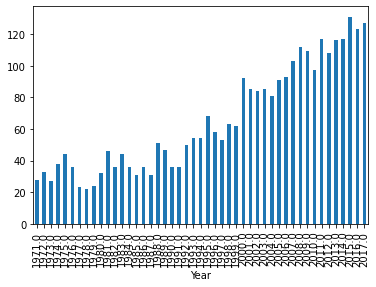

In [525]:
#Group the data by Year and count the element of the column Fatal(no missing data since the cleaning)
Nb_attacks_per_year=data.groupby(by='Year',axis=0).count()['Fatal_(Y/N)']
Nb_attacks_per_year.plot(kind="bar")

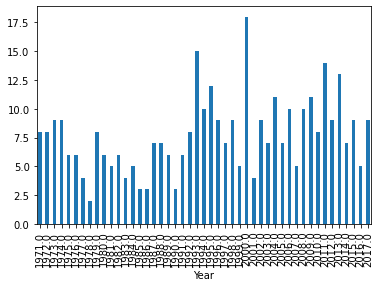

In [526]:
Nb_deaths_per_year=data[data['Fatal_(Y/N)'] =="Y"].groupby(by='Year',axis=0).count()['Fatal_(Y/N)']
Nb_deaths_per_year.plot(kind="bar")

In [527]:
data.shape# for the period I study

(3070, 23)

In [528]:
Injur=pd.Series(data.Injury_severity).value_counts().to_dict()
Injur

{'No injury': 437, 'Fatal': 362, 'minor injury': 176}

In [463]:
nb_of_not_qualified_and_severe_injuries = data.shape[0]-Injur['Fatal']-Injur['No injury']-Injur['minor injury']
nb_of_not_qualified_and_severe_injuries

2095

In [529]:
#Percentage of identified no injuries and minor
(Injur['No injury']+Injur['minor injury'])/data.shape[0]*100

19.96742671009772

In [530]:
#Percentage Fatal
Injur['Fatal']/data.shape[0]*100

11.791530944625407

# Conclusions linked to the cleaning and analysis exercice itself
### Even non complex questions like Fatal Y or N in an interwiew can generate hundreds of diffent answers ambiguous, strange, not related answers
### Checking for consistency is essential
### never assume data are clean
### cleaning is time consuming!
### cleaning depends of the problematics
### Pandas is a nightmare

# Test area for formulas